In [1]:
from mlxtend.frequent_patterns import association_rules, apriori
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving book (1).csv to book (1).csv


In [3]:
df = pd.read_csv('book (1).csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.shape

(2000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
#EDA
#check for missing values
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

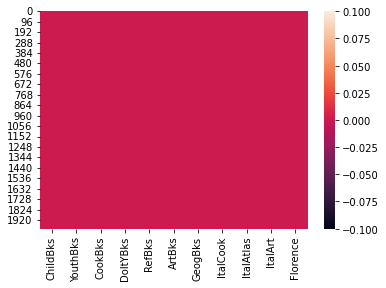

In [7]:
import seaborn as sns
sns.heatmap(df.isna())

In [9]:
#check for duplicate values.
df[df.duplicated()].sum()

ChildBks     650
YouthBks     351
CookBks      644
DoItYBks     407
RefBks       267
ArtBks       304
GeogBks      385
ItalCook     120
ItalAtlas     23
ItalArt       36
Florence     115
dtype: int64

We will not remove these values as this data is in binary values, there are a lot of chances that it may get duplicated so we will keep the data as it is.

In [10]:
#check for dtypes of columns
df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [11]:
#Number of times each book was purchased
df.iloc[:,:].sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [12]:
df['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

In [13]:
df['YouthBks'].value_counts()

0    1505
1     495
Name: YouthBks, dtype: int64

In [14]:
df['CookBks'].value_counts()

0    1138
1     862
Name: CookBks, dtype: int64

In [15]:
df['DoItYBks'].value_counts()

0    1436
1     564
Name: DoItYBks, dtype: int64

In [16]:
df['RefBks'].value_counts()

0    1571
1     429
Name: RefBks, dtype: int64

In [17]:
df['ArtBks'].value_counts()

0    1518
1     482
Name: ArtBks, dtype: int64

In [18]:
df['GeogBks'].value_counts()

0    1448
1     552
Name: GeogBks, dtype: int64

In [19]:
df['ItalCook'].value_counts()

0    1773
1     227
Name: ItalCook, dtype: int64

In [20]:
df['ItalAtlas'].value_counts()

0    1926
1      74
Name: ItalAtlas, dtype: int64

In [21]:
df['ItalArt'].value_counts()

0    1903
1      97
Name: ItalArt, dtype: int64

In [22]:
df['Florence'].value_counts()

0    1783
1     217
Name: Florence, dtype: int64

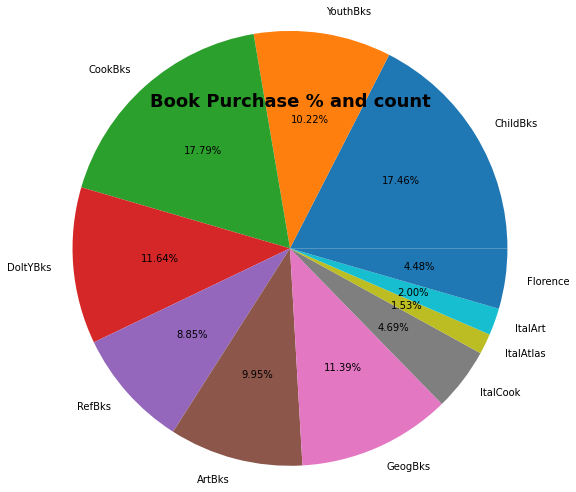

In [23]:
#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
values_book = df.iloc[:,:].sum()
labels_book = df.columns
plt.figure(figsize = [5,5])
plt.pie(values_book, labels=labels_book, autopct= '%.2f%%', radius = 2)
plt.title('Book Purchase % and count', fontsize = 18, fontweight = 'bold')
plt.show()

In [24]:
values_book.sort_values(0, ascending = False, inplace=True)
count = values_book.to_frame().reset_index()
count = count.rename(columns = {'index': 'Movies',0: 'Purchase Frequency'})
count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


,Movies,Purchase Frequency
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


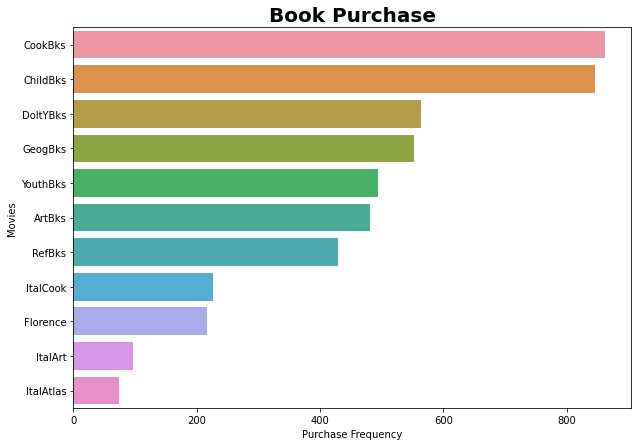

In [25]:
plt.figure(figsize=[10,7])
sns.barplot(x = 'Purchase Frequency', y = 'Movies', data = count)
plt.title('Book Purchase', fontsize=20, fontweight= 'bold')
plt.show()

In [26]:
#Apriori Algorithm
#with support atleast 0.1 and confidence = 70%
frequent_itemsets = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [27]:
rule = association_rules(frequent_itemsets, metric = "lift", min_threshold = .70)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [28]:
rule.sort_values('lift', ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


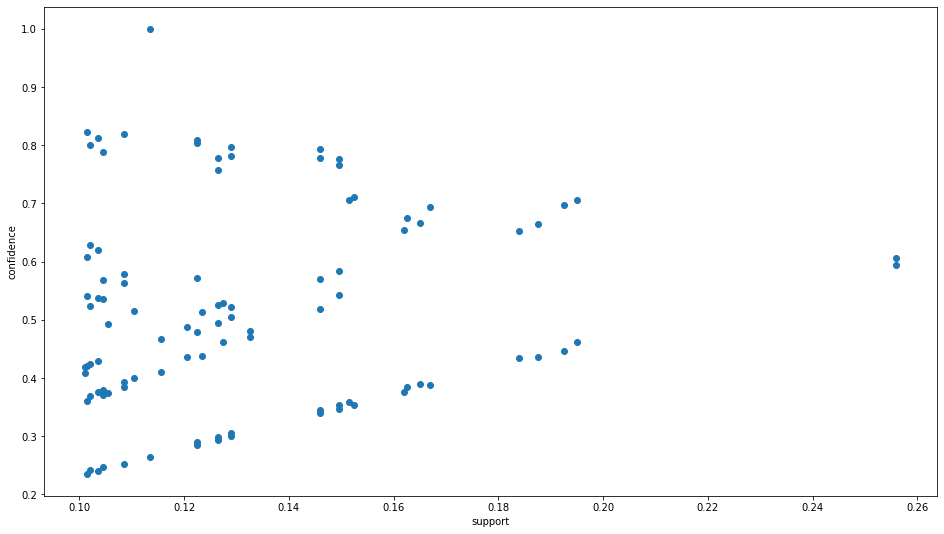

In [29]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


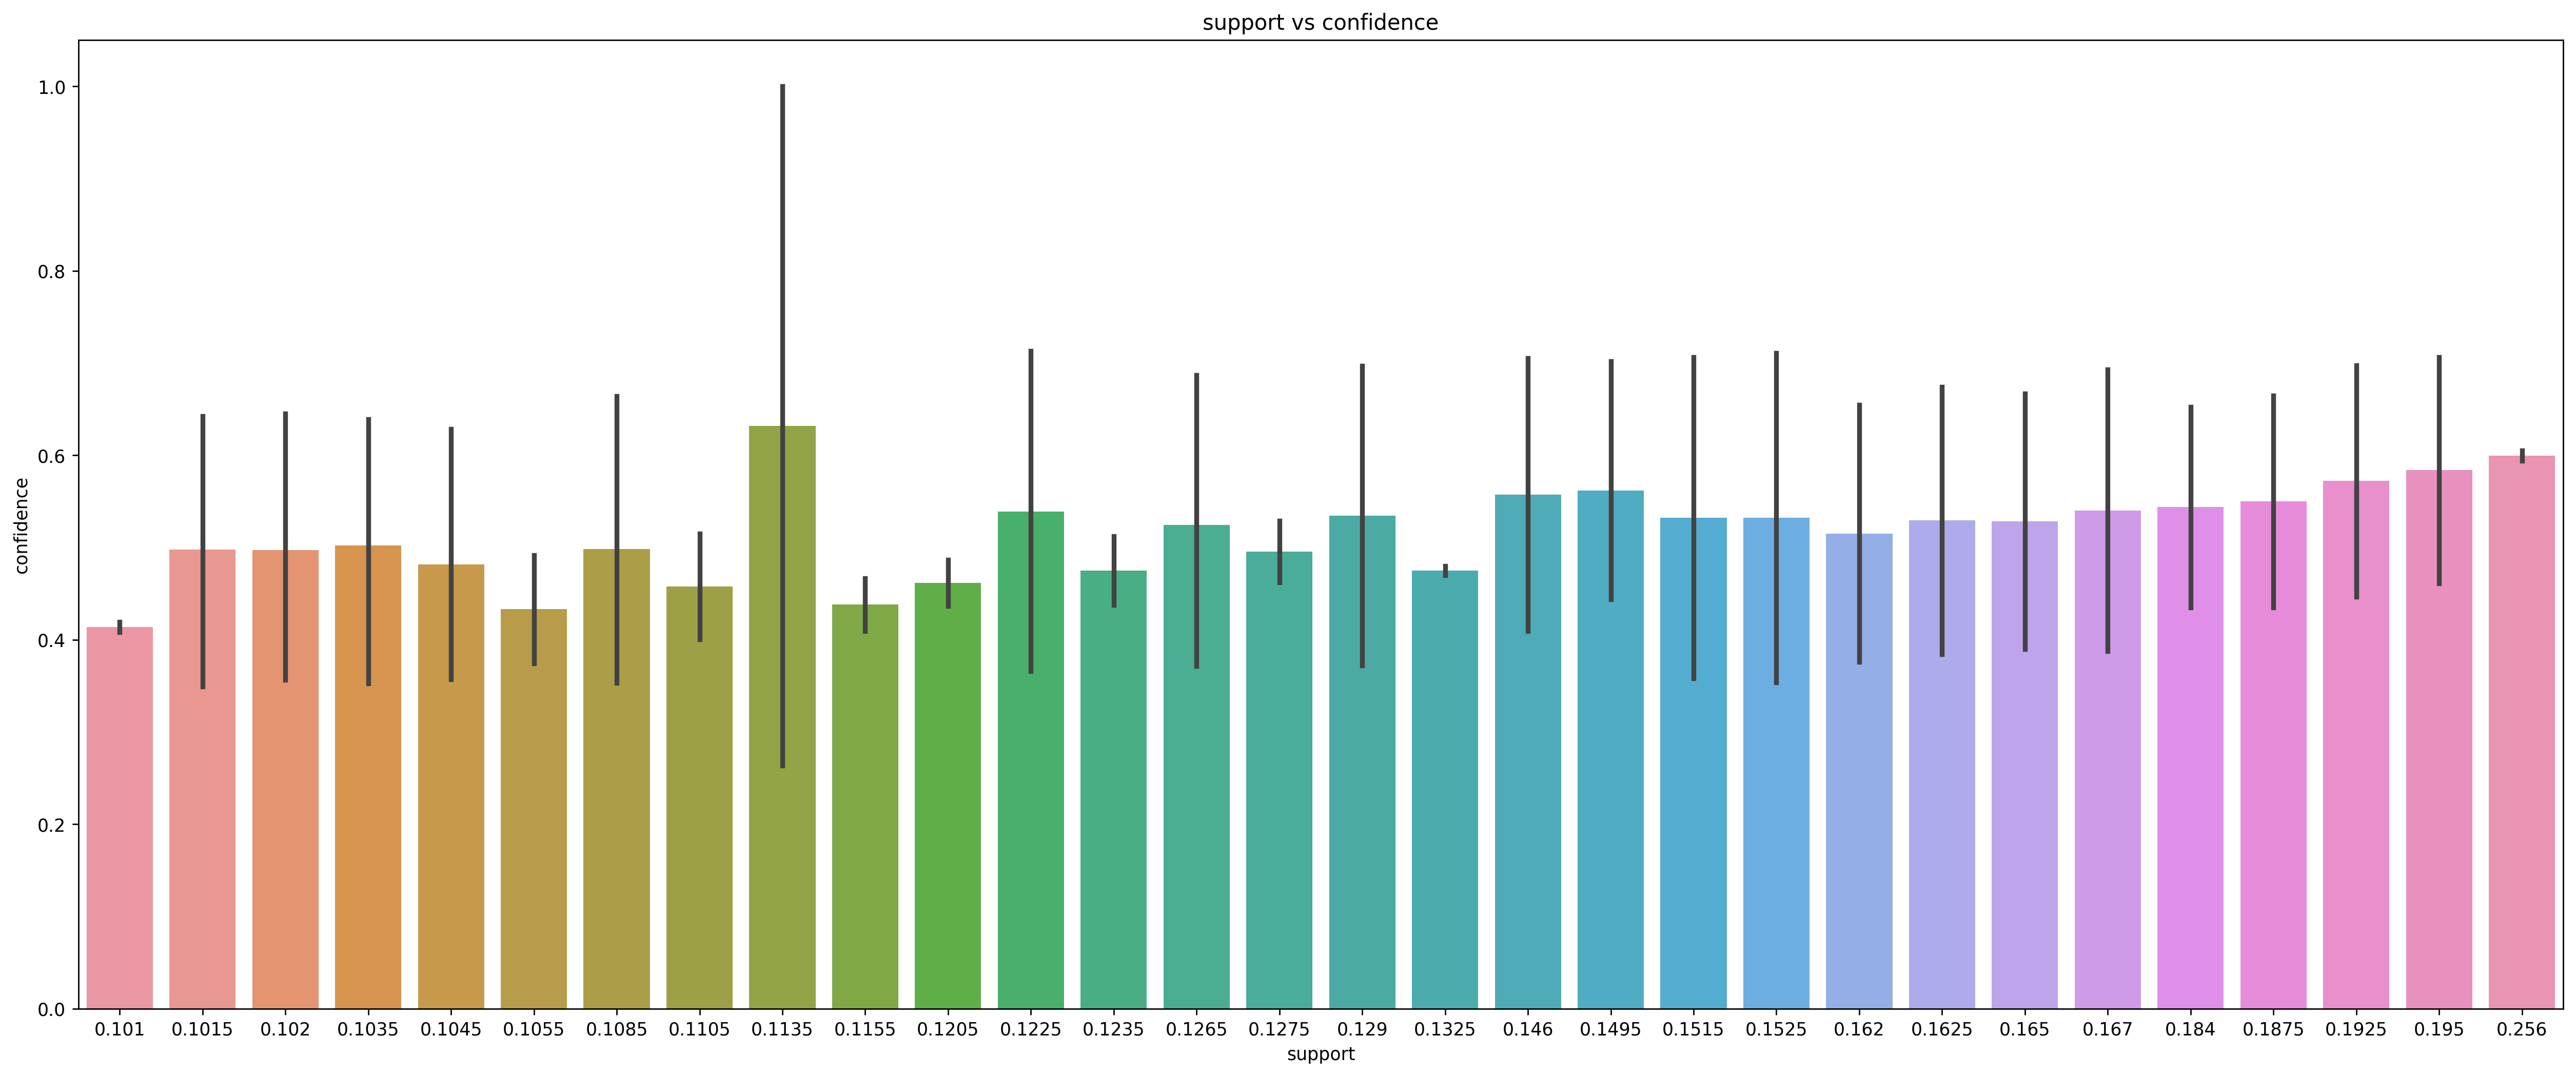

In [30]:
plt.figure(figsize=(25,10),dpi=250)
sns.barplot("support","confidence",data=rule)
plt.title("support vs confidence")
plt.show()

In [31]:
#with support atleast 0.15 and confidence >= 70%
frequent_itemsets1 = apriori(df, min_support = 0.15, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [32]:
rule1 = association_rules(frequent_itemsets1, metric = "lift", min_threshold = .70)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


We can observe by increasing the min support level we have reduced the number of rules as well.

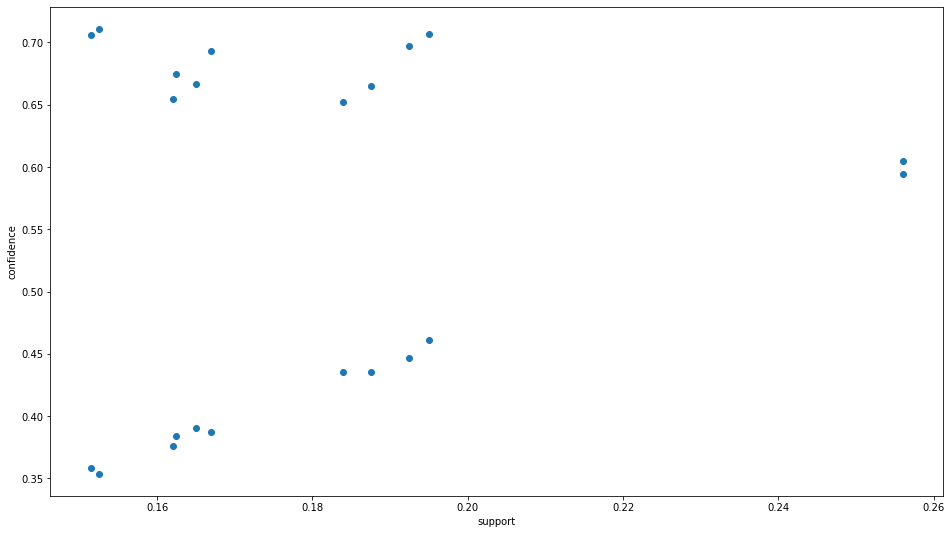

In [33]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


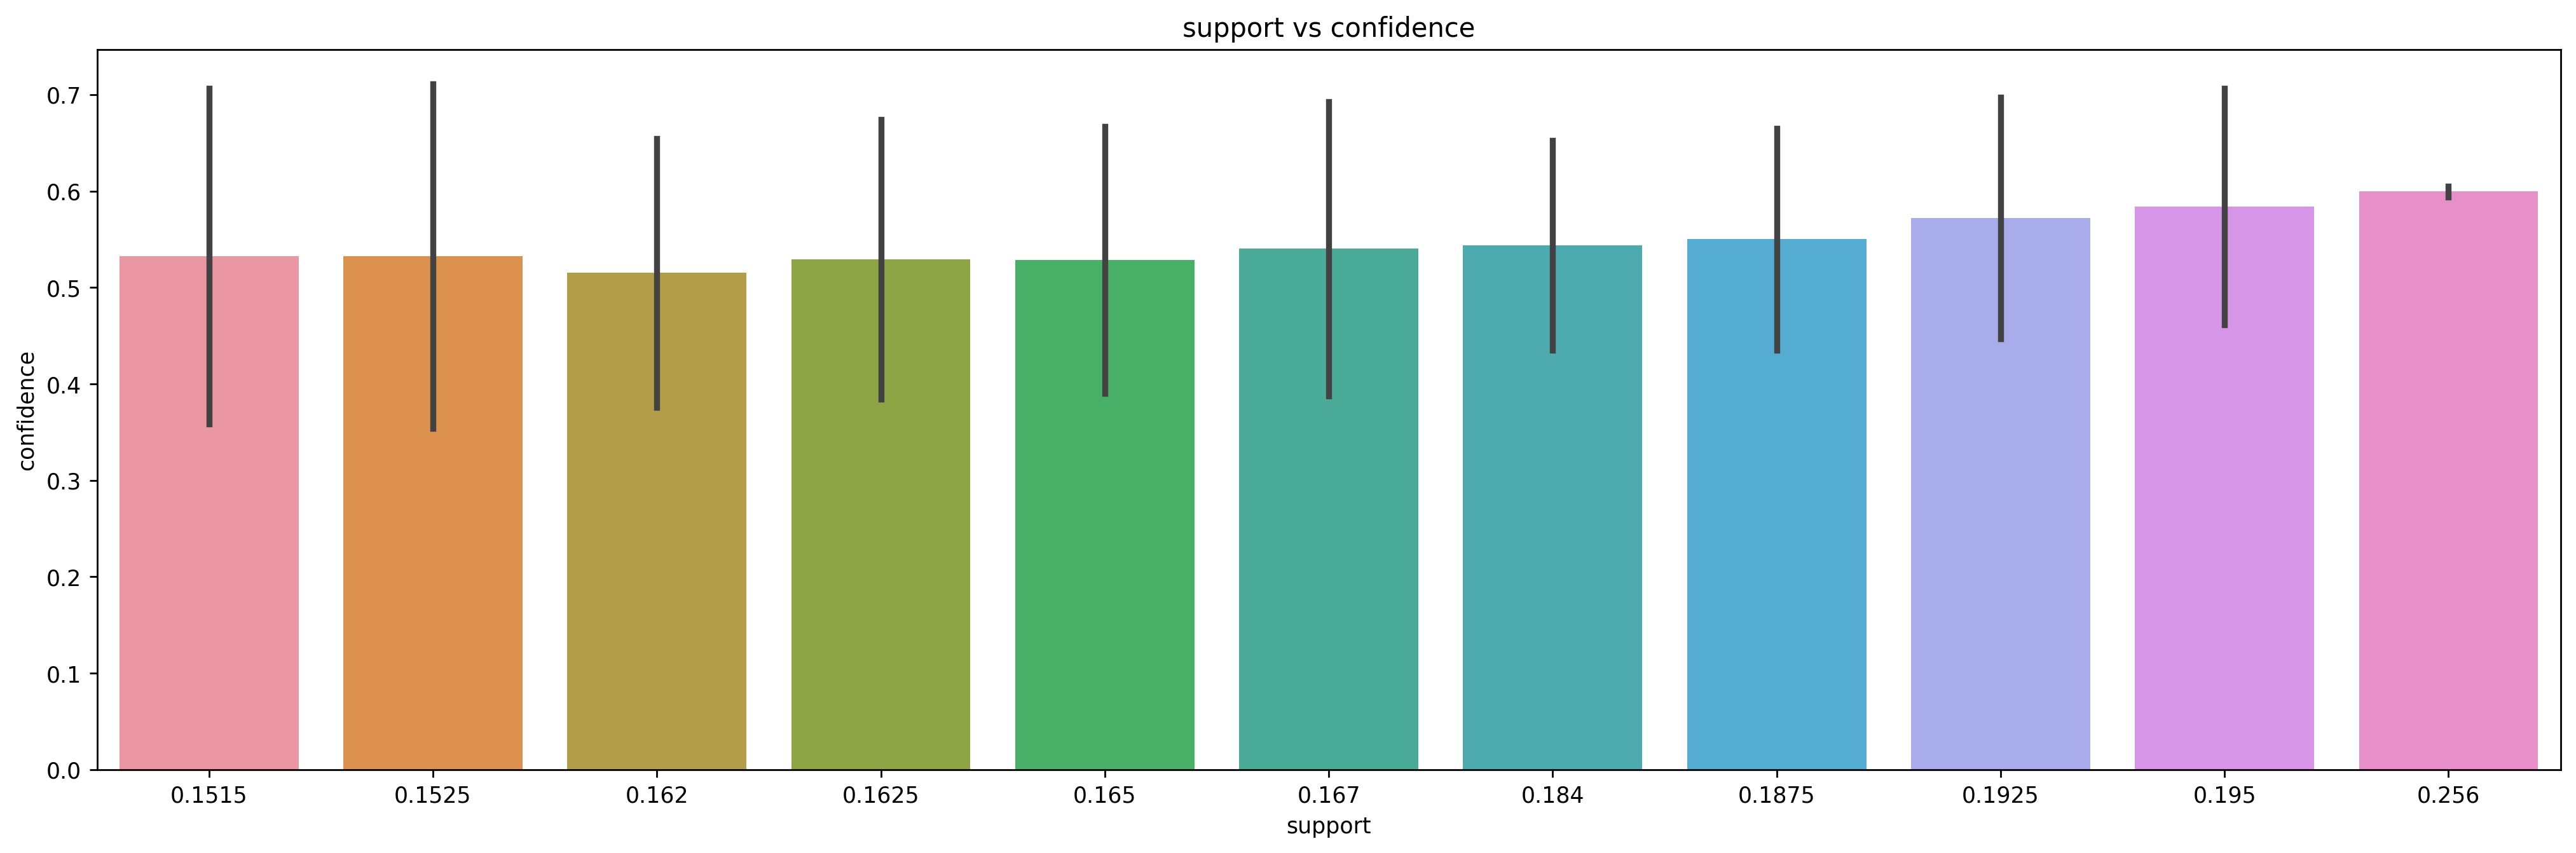

In [34]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule1)
plt.title("support vs confidence")
plt.show()

In [35]:
#with support atleast 0.1 and confidence >= 60%
frequent_itemsets2 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets2.shape

(39, 2)

In [36]:
rule2 = association_rules(frequent_itemsets2, metric = "lift", min_threshold = .60)
rule2.shape

(100, 9)

Even after decreasing confidence the number of rules remain same.

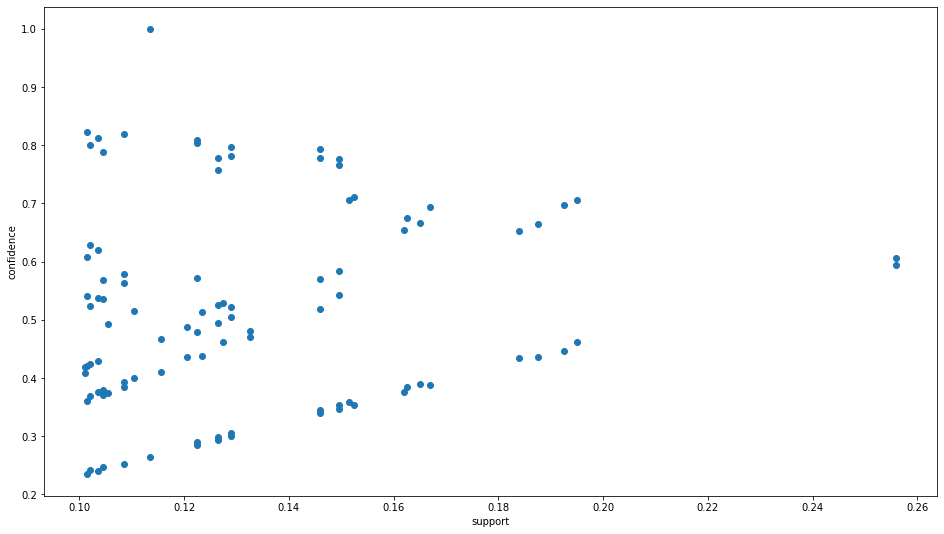

In [37]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


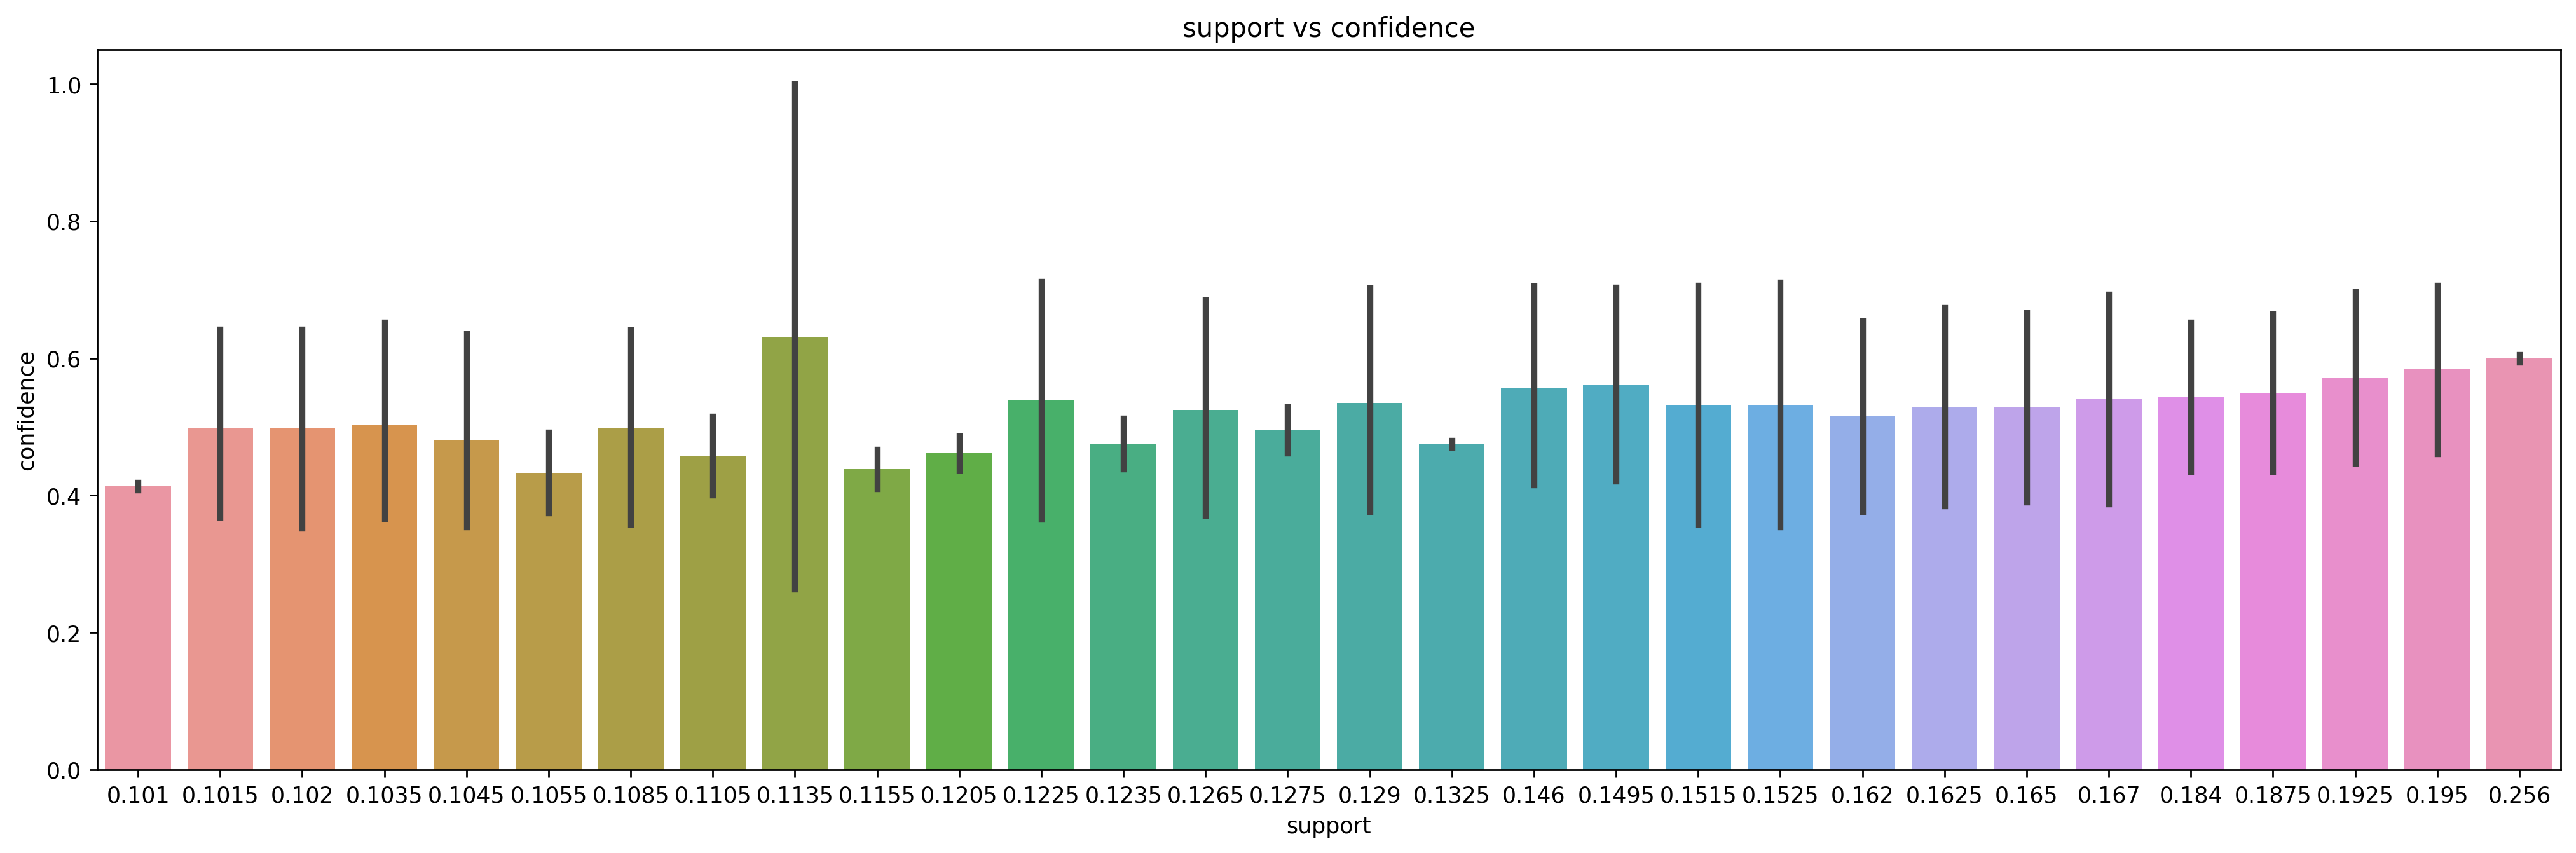

In [38]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule2)
plt.title("support vs confidence")
plt.show()

In [39]:
#Min Support = 10% Confidence = 80%
frequent_itemsets3 = apriori(df, min_support = 0.1, use_colnames=True)
frequent_itemsets3.shape

(39, 2)

In [40]:
rule3 = association_rules(frequent_itemsets3, metric = "lift", min_threshold = .80)
rule3.shape

(100, 9)

In this dataset there is no change in number of rules by confidence.

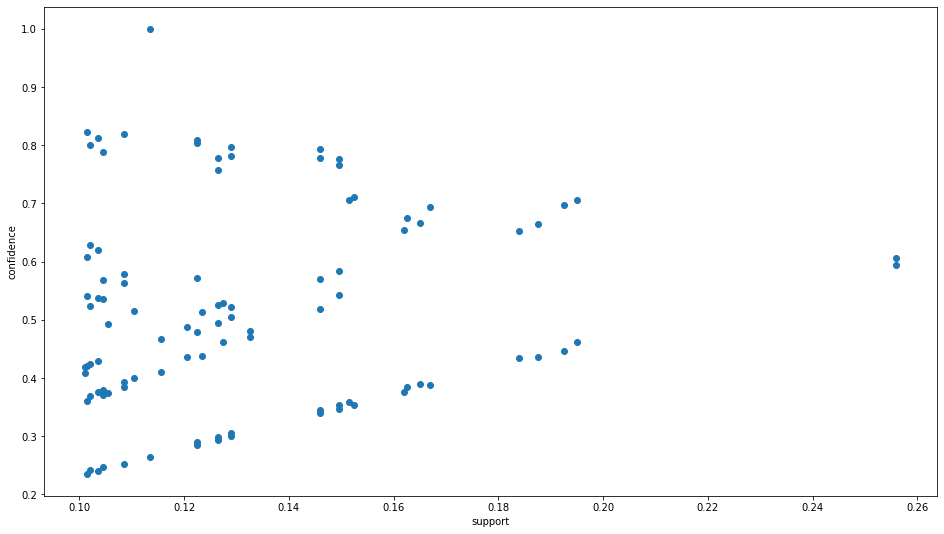

In [41]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule3['support'],rule3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


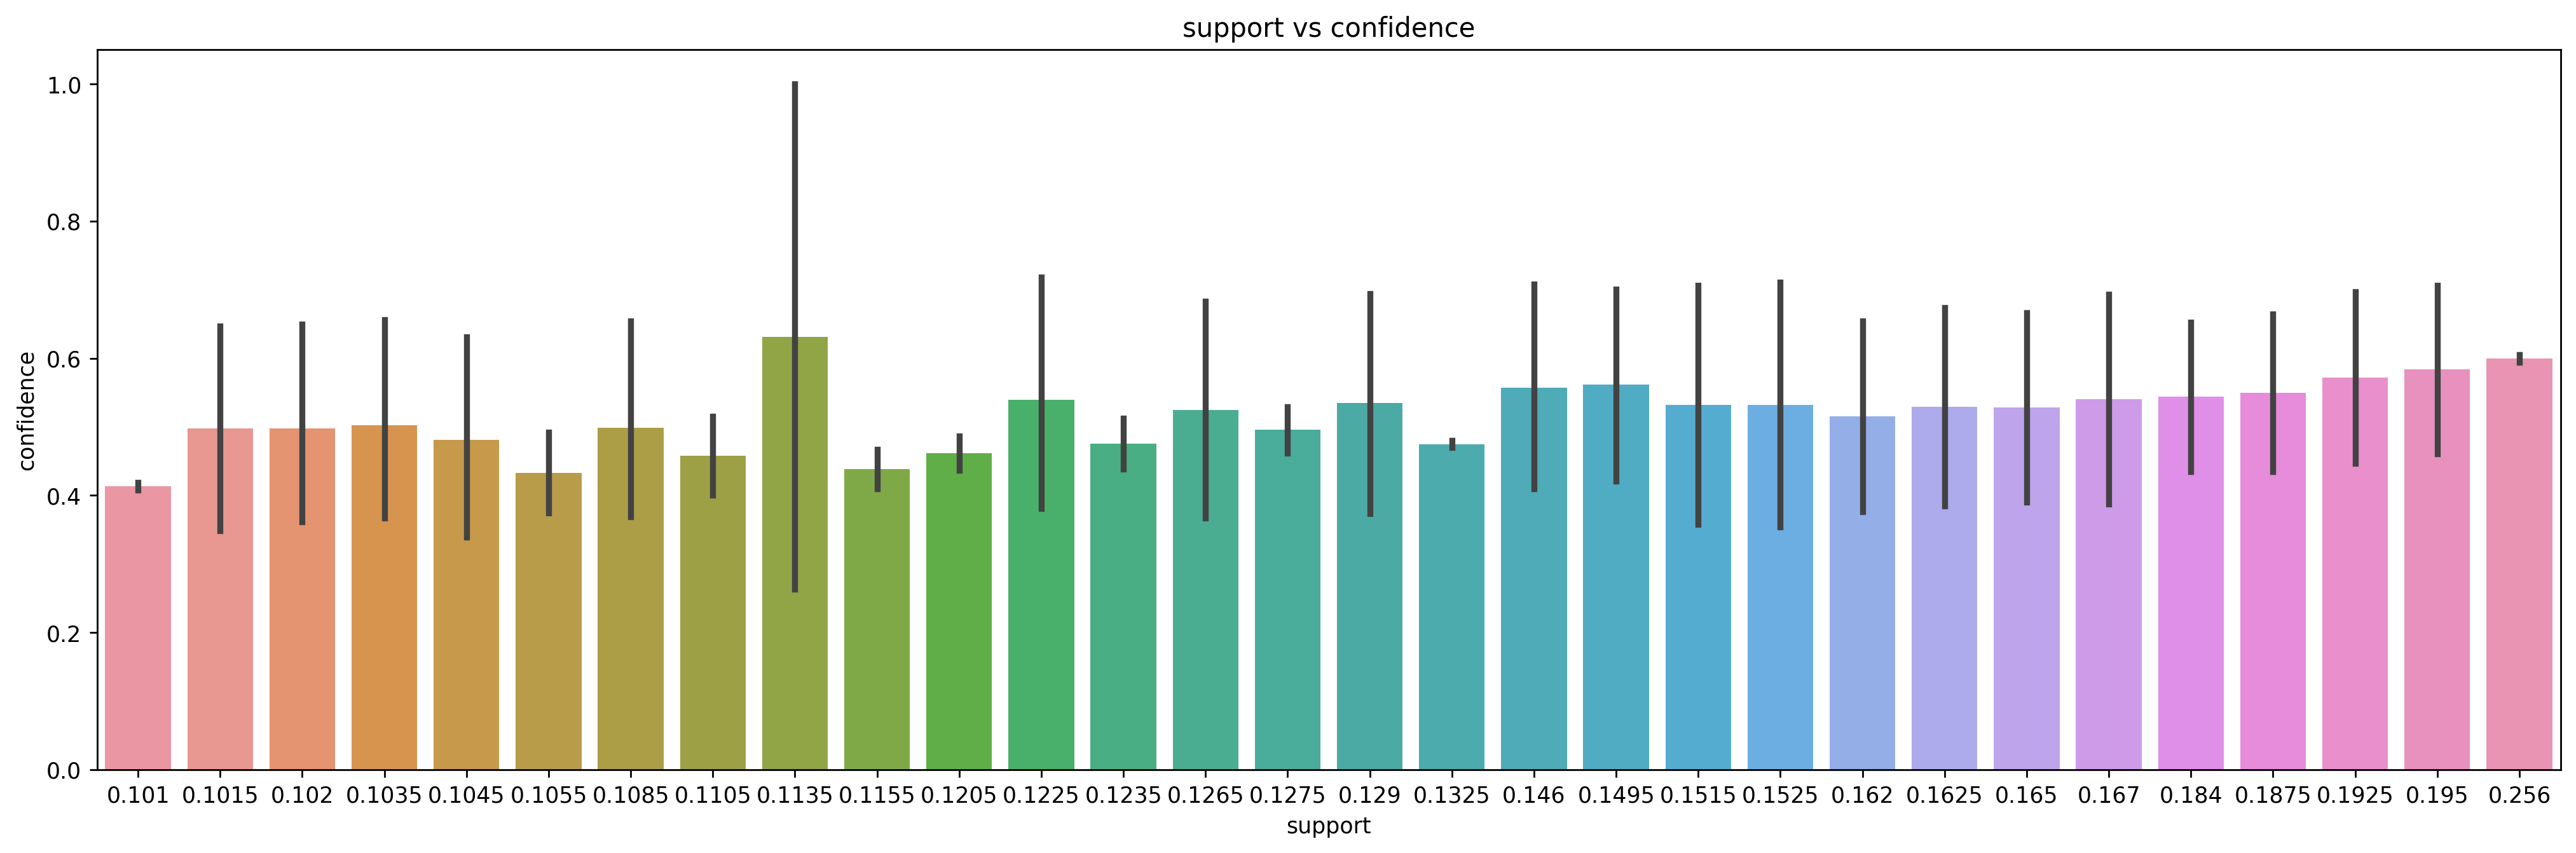

In [42]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rule3)
plt.title("support vs confidence")
plt.show()

In [43]:
#Min Support = 0.07 Confidence = 80%
frequent_itemsets4 = apriori(df, min_support = 0.07, use_colnames=True)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, ChildBks, DoItYBks, CookBks)"
62,0.0820,"(ChildBks, ArtBks, DoItYBks, CookBks)"
63,0.0890,"(ChildBks, GeogBks, DoItYBks, CookBks)"
64,0.0785,"(RefBks, ChildBks, GeogBks, CookBks)"


In [44]:
rule4 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .80)
rule4.shape

(306, 9)

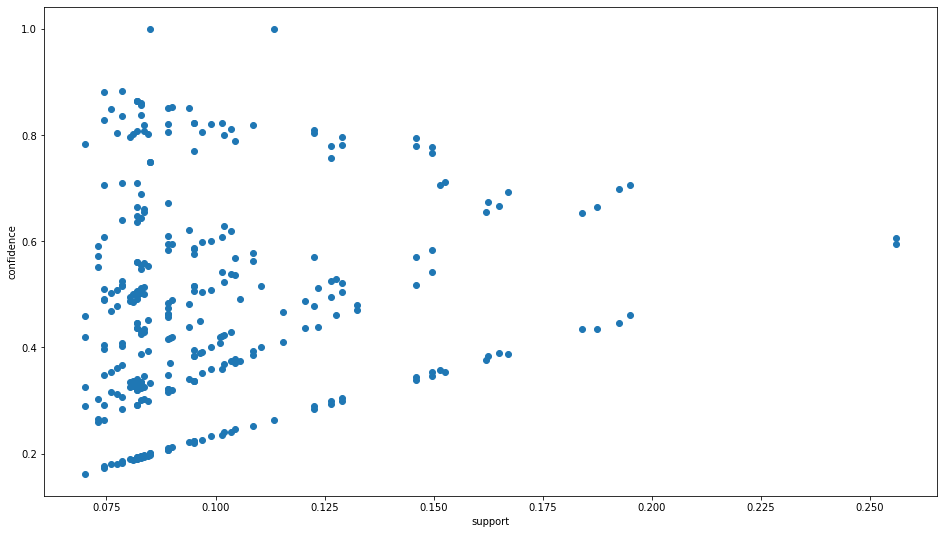

In [45]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule4['support'],rule4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


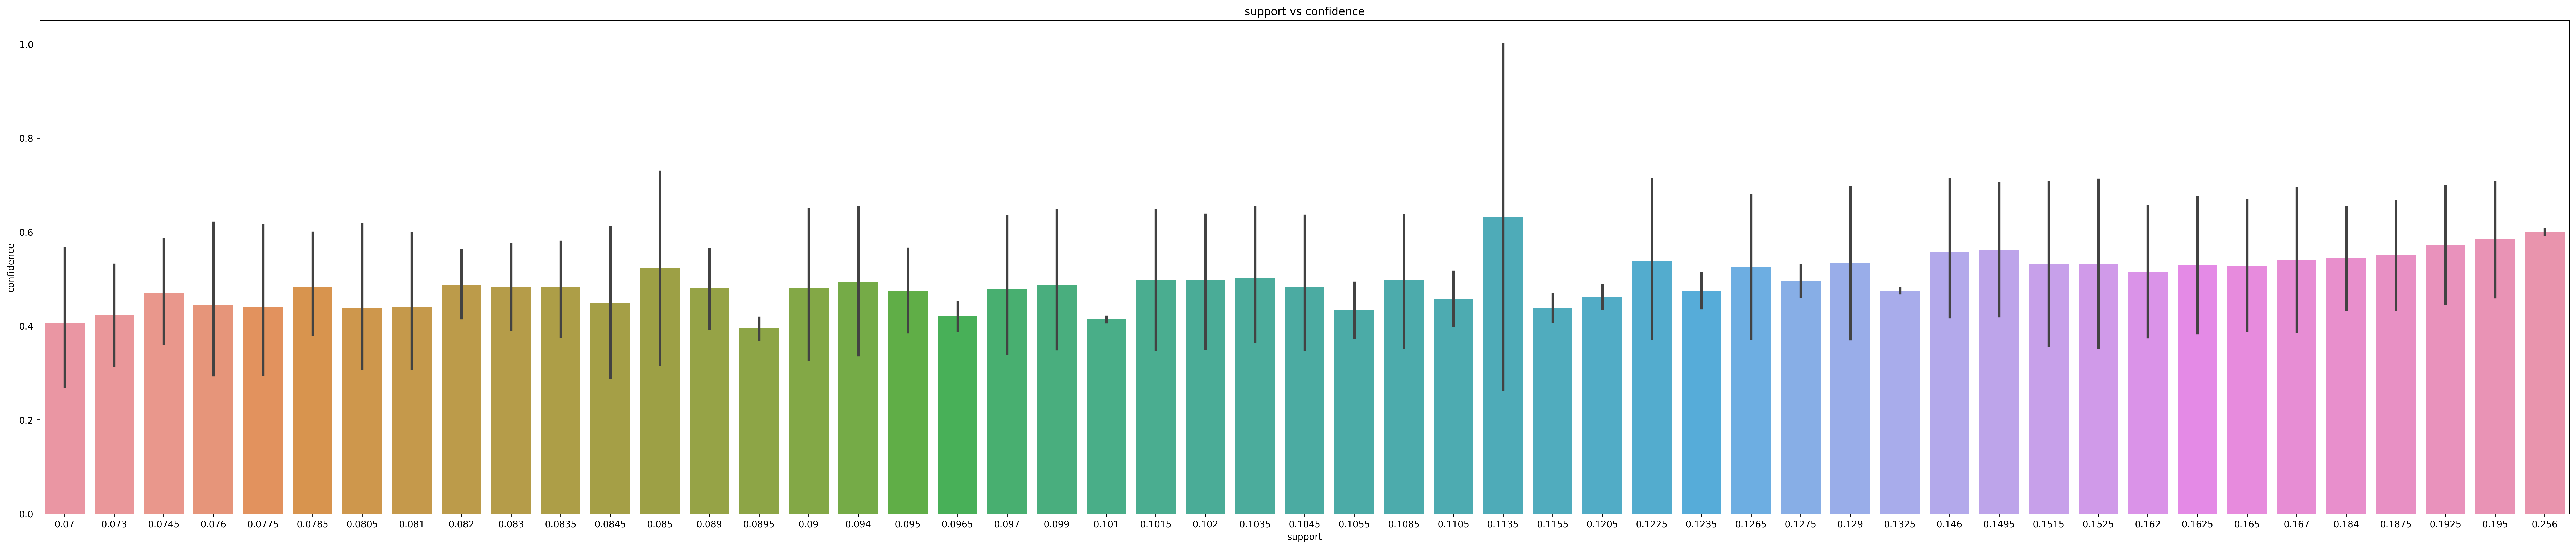

In [46]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule4)
plt.title("support vs confidence")
plt.show()

In [47]:
#Min Support = 7%, Confidence = 70%
rule5 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .70)
rule5.shape

(306, 9)

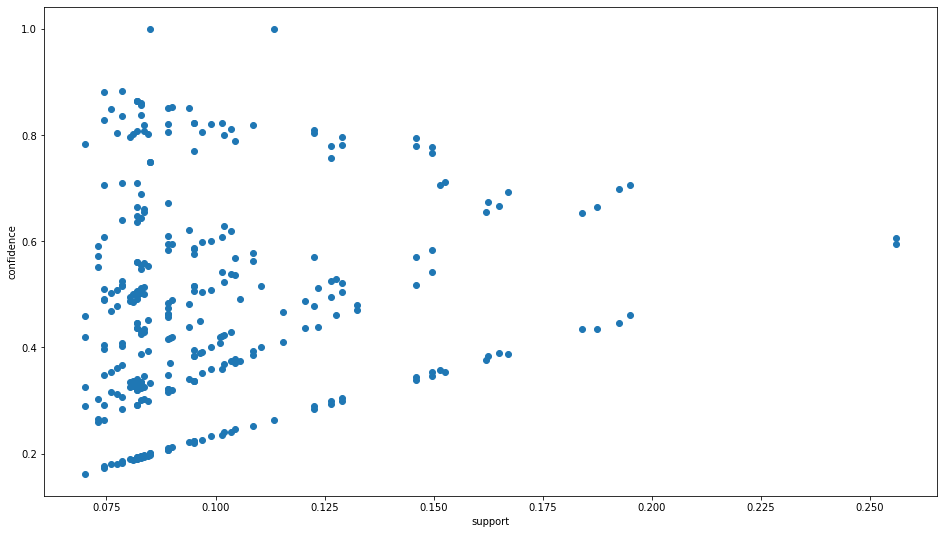

In [48]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule5['support'],rule5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


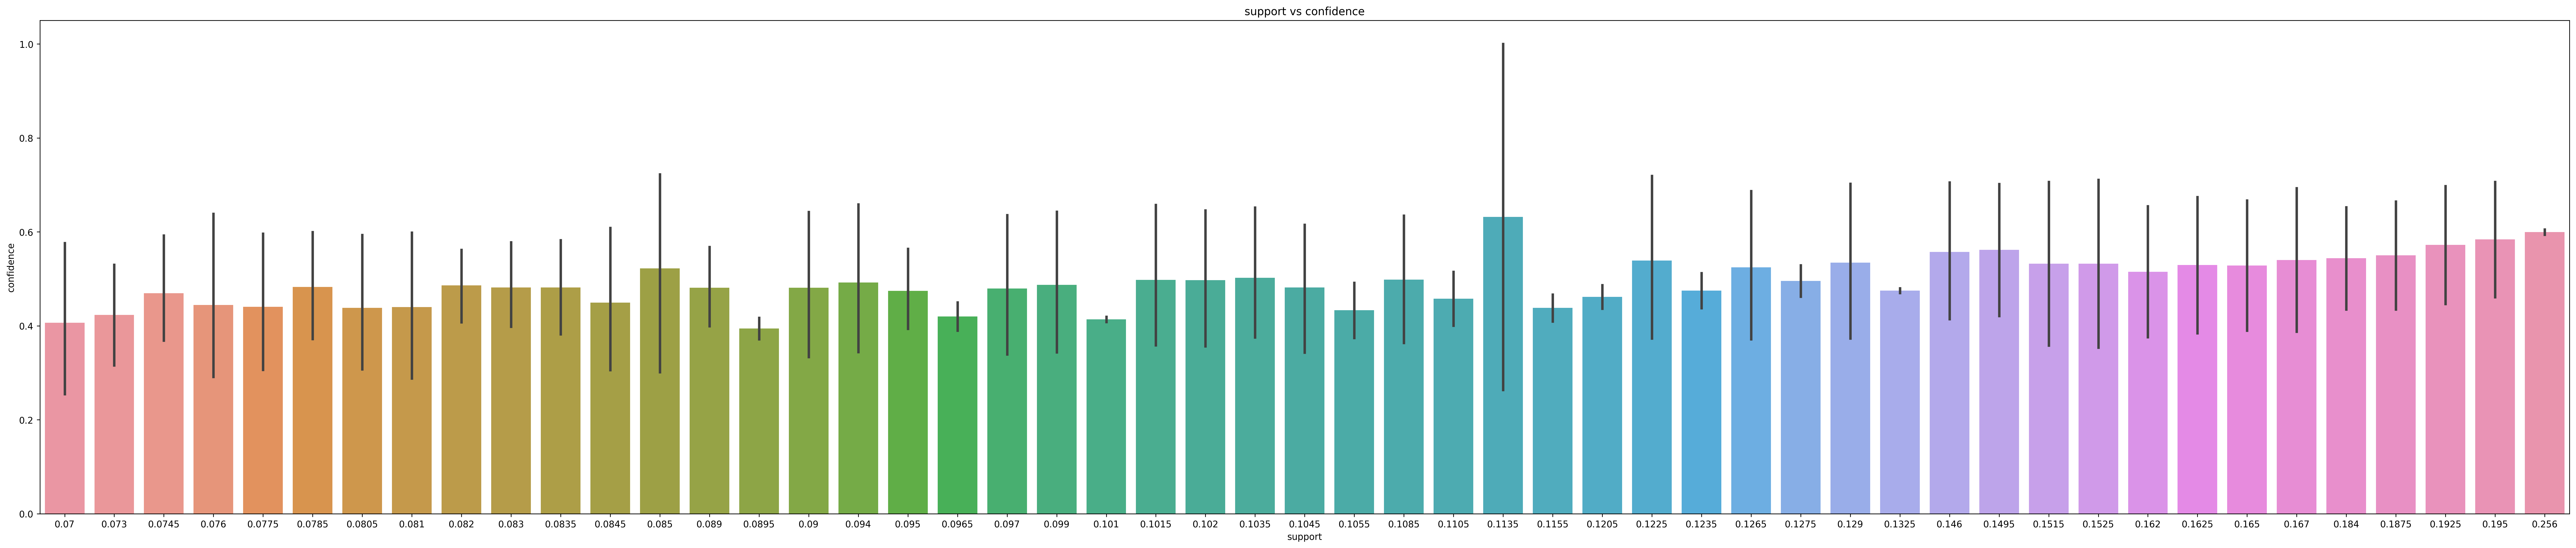

In [49]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule5)
plt.title("support vs confidence")
plt.show()

In [50]:
#Min Support = 7%, Confidence = 60%
rule6 = association_rules(frequent_itemsets4, metric = "lift", min_threshold = .60)
rule6.shape

(306, 9)

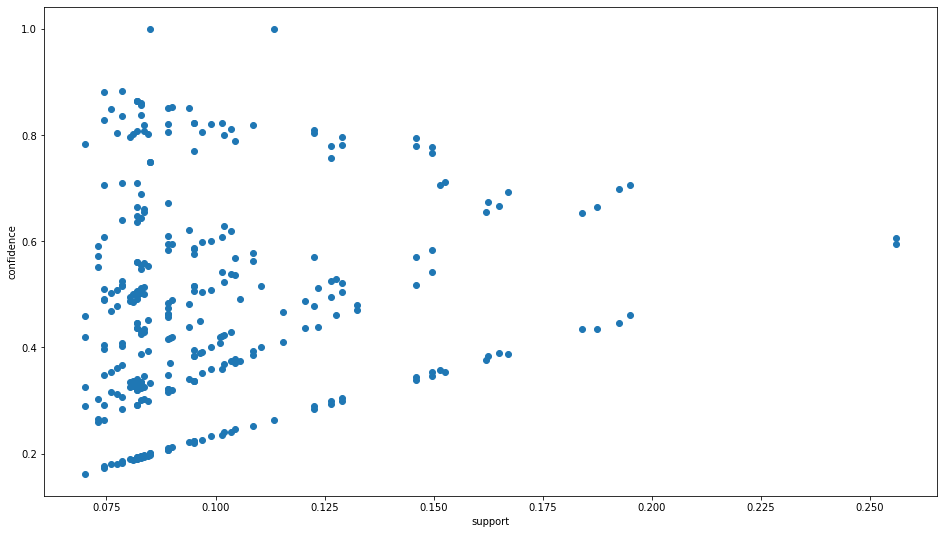

In [51]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rule6['support'],rule6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


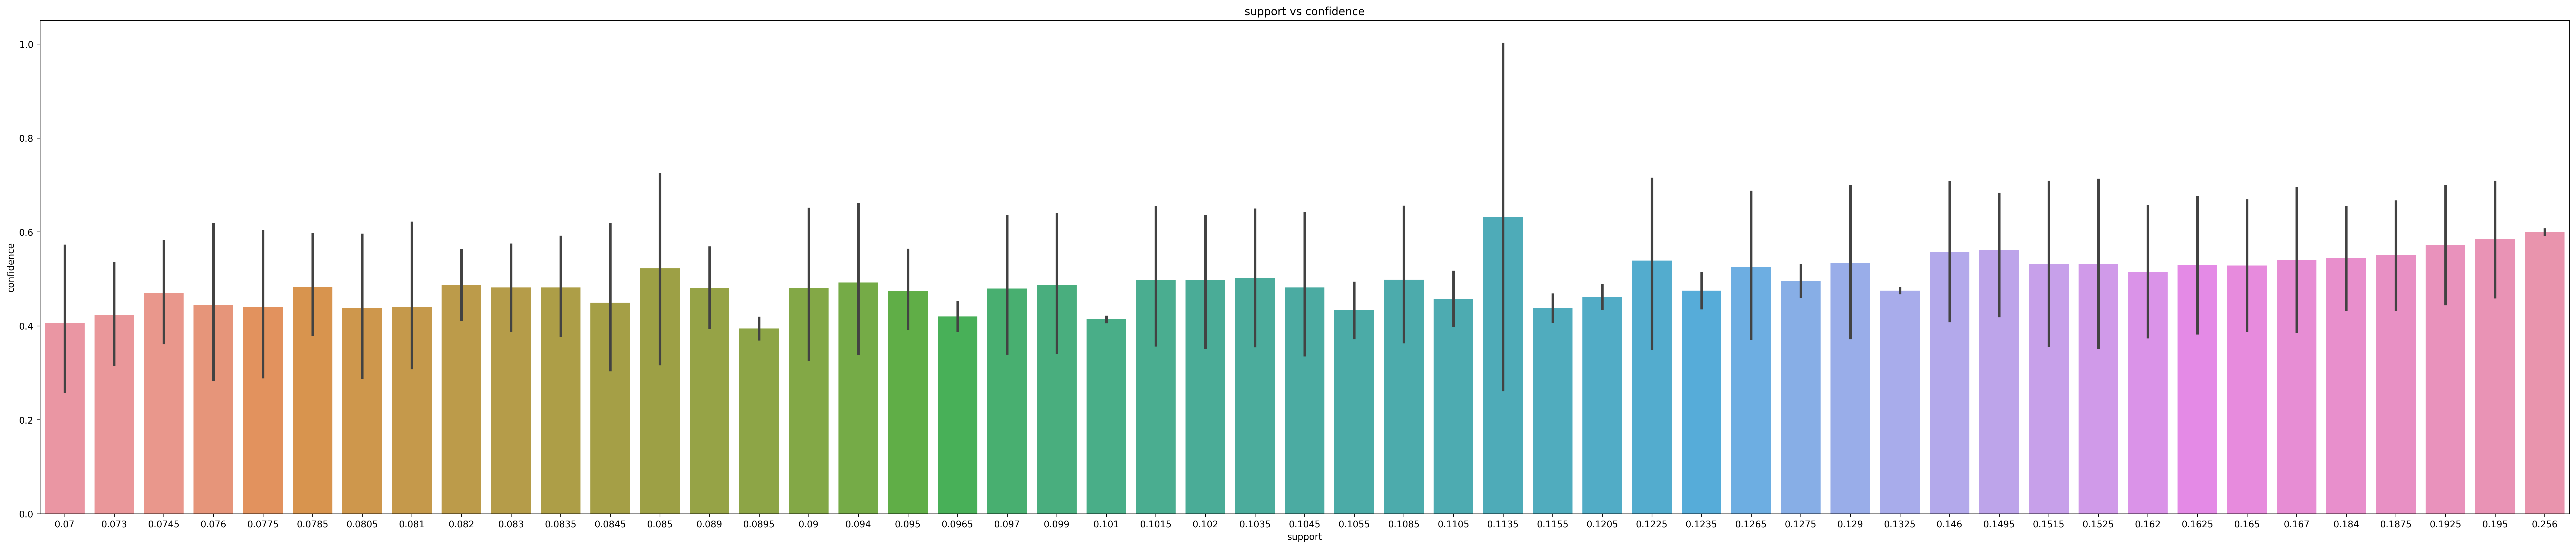

In [52]:
plt.figure(figsize=(50,10),dpi=250)
sns.barplot("support","confidence",data=rule6)
plt.title("support vs confidence")
plt.show()

In this dataset we can confirm if min support is reduced, number of rules are increased but if confidence chnages there is no difference in number of rules.

Also we can observe if we lower the min support then we get higher lengths of column clubbed together.